In [2]:
library(DropletUtils)
library(scds)
library(feather)
library(Matrix)
library(SoupX)
library(data.table)
library(Seurat)

In [8]:
dataDirs1 = c("/Monkey_P_Nacc_Rep2")

In [9]:
toc = Seurat::Read10X(file.path(dataDirs1, "filtered_feature_bc_matrix", "soupx_data"))
tod = Seurat::Read10X(file.path(dataDirs1, "raw_feature_bc_matrix", "soupx_data"))
#sc = SoupChannel(tod, toc)

In [10]:
sc1 = SoupChannel(tod, toc, calcSoupProfile = FALSE)
sc1 = estimateSoup(sc1)

In [11]:
sc1

Channel with 54894 genes and 14338 cells



In [12]:
str(sc1)

List of 4
 $ toc        :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. ..@ i       : int [1:51297654] 99 112 123 124 129 135 148 171 217 218 ...
  .. ..@ p       : int [1:14339] 0 3234 7185 11696 19165 21847 25164 31349 32845 35098 ...
  .. ..@ Dim     : int [1:2] 54894 14338
  .. ..@ Dimnames:List of 2
  .. .. ..$ : chr [1:54894] "WASH7P" "MIR6859-1" "MIR1302-2HG" "MIR1302-2" ...
  .. .. ..$ : chr [1:14338] "AAACCCAAGACTAAGT-1" "AAACCCAAGCGCGTTC-1" "AAACCCAAGCTGCGAA-1" "AAACCCAAGTAATTGG-1" ...
  .. ..@ x       : num [1:51297654] 1 1 1 2 1 1 1 1 1 1 ...
  .. ..@ factors : list()
 $ metaData   :'data.frame':	14338 obs. of  1 variable:
  ..$ nUMIs: num [1:14338] 6450 9826 12802 29936 5300 ...
 $ nDropUMIs  : Named num [1:6794880] 1 2 3 1 0 0 0 1 1 0 ...
  ..- attr(*, "names")= chr [1:6794880] "AAACCCAAGAAACACT-1" "AAACCCAAGAAACCAT-1" "AAACCCAAGAAACCCA-1" "AAACCCAAGAAACCCG-1" ...
 $ soupProfile:'data.frame':	54894 obs. of  2 variables:
  ..$ est   : num [1:54894] 0 0 0 0 0

In [13]:
set.seed(1)

In [14]:
srat = CreateSeuratObject(sc1$toc)

In [15]:
srat = NormalizeData(srat)

In [16]:
srat = ScaleData(srat)

Centering and scaling data matrix



In [17]:
#srat = FindVariableGenes(srat)
srat = FindVariableFeatures(srat)

In [18]:
srat = RunPCA(srat,pcs.compute=30)

PC_ 1 
Positive:  SLC1A3, SLC1A2, NEAT1, ZEB2, NHSL1, PDZRN4, AL355612.1, ADGRV1, ETNPPL, LINC00499 
	   GRAMD2B, ABCA8, CABLES1, TCF7L2, MBP, ALDH1A1, C10orf90, SLC25A18, ITPKB, FBXL7 
	   ST18, MFGE8, RNF219-AS1, ACSBG1, GLI3, AC099792.1, MOBP, PIP4K2A, AC008957.2, XIRP2 
Negative:  PTPRN2, CACNA1C, MYT1L, SPTBN4, SHANK2, KSR2, ABLIM2, SRRM3, DLGAP2, CELF4 
	   KLHL29, ATP8A2, TMEM178B, RAP1GAP2, RBFOX3, AGBL4, CACNA1E, DPP6, CACNA1D, CNTNAP2 
	   RIMBP2, TENM4, RBFOX1, CADPS, AL117190.2, MEG8, AFF3, ERC2, GRIA1, RYR2 
PC_ 2 
Positive:  CABLES1, SLC25A18, PDZRN4, AL355612.1, LINC00499, ADGRV1, SLC6A11, NHSL1, ROR1, SLC1A2 
	   ETNPPL, GLI3, TRPM3, ALDH1A1, TCF7L1, SLC1A3, AC099792.1, ACSBG1, MFGE8, RNF219-AS1 
	   SORCS2, TNC, AC008957.2, ITPKB, GLIS3, LAMA1, GRAMD2B, U91319.1, RGS6, AQP4-AS1 
Negative:  ST18, ELMO1, MBP, SLC24A2, RNF220, AL008633.1, MOBP, PLCL1, ENPP2, ZNF536 
	   PIP4K2A, MIR181A1HG, FRMD4B, PEX5L, CLMN, AL359091.1, MOG, AJ009632.2, KIF13B, CREB5 
	   HAPLN2, SHROO

In [19]:
srat = RunTSNE(srat,dims.use=seq(30))

In [20]:
srat <- FindNeighbors(srat, dims = 1:30)

Computing nearest neighbor graph

Computing SNN



In [21]:
srat = FindClusters(srat, resolution = 0.5)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 14338
Number of edges: 574424

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9439
Number of communities: 25
Elapsed time: 2 seconds


In [22]:
str(srat)

Formal class 'Seurat' [package "Seurat"] with 13 slots
  ..@ assays      :List of 1
  .. ..$ RNA:Formal class 'Assay' [package "Seurat"] with 8 slots
  .. .. .. ..@ counts       :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. .. .. ..@ i       : int [1:51297654] 99 112 123 124 129 135 148 171 217 218 ...
  .. .. .. .. .. ..@ p       : int [1:14339] 0 3234 7185 11696 19165 21847 25164 31349 32845 35098 ...
  .. .. .. .. .. ..@ Dim     : int [1:2] 54894 14338
  .. .. .. .. .. ..@ Dimnames:List of 2
  .. .. .. .. .. .. ..$ : chr [1:54894] "WASH7P" "MIR6859-1" "MIR1302-2HG" "MIR1302-2" ...
  .. .. .. .. .. .. ..$ : chr [1:14338] "AAACCCAAGACTAAGT-1" "AAACCCAAGCGCGTTC-1" "AAACCCAAGCTGCGAA-1" "AAACCCAAGTAATTGG-1" ...
  .. .. .. .. .. ..@ x       : num [1:51297654] 1 1 1 2 1 1 1 1 1 1 ...
  .. .. .. .. .. ..@ factors : list()
  .. .. .. ..@ data         :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. .. .. ..@ i       : int [1:51297654] 99 112 123 124

In [23]:
PBMC_DR = as.data.frame(srat$tsne@cell.embeddings)

In [24]:
colnames(PBMC_DR) = c('RD1','RD2')

In [25]:
str(PBMC_DR)

'data.frame':	14338 obs. of  2 variables:
 $ RD1: num  -4.84 8.21 3.08 25.29 44.23 ...
 $ RD2: num  -33.3 28.3 32.6 16.8 14.1 ...


In [26]:
PBMC_DR$Cluster = factor(srat@meta.data[rownames(PBMC_DR),'RNA_snn_res.0.5'])

In [27]:
str(srat@meta.data)

'data.frame':	14338 obs. of  5 variables:
 $ orig.ident     : Factor w/ 1 level "SeuratProject": 1 1 1 1 1 1 1 1 1 1 ...
 $ nCount_RNA     : num  6450 9826 12802 29936 5300 ...
 $ nFeature_RNA   : int  3234 3951 4511 7469 2682 3317 6185 1496 2253 3302 ...
 $ RNA_snn_res.0.5: Factor w/ 25 levels "0","1","2","3",..: 2 12 4 3 5 1 9 13 1 12 ...
 $ seurat_clusters: Factor w/ 25 levels "0","1","2","3",..: 2 12 4 3 5 1 9 13 1 12 ...


In [28]:
getwd()

[1] "/slow/Jing/Penuts_cellranger_snRNA_results_b2/1_soupx"

In [25]:
#saveRDS(PBMC_DR, file = "~/Documents/Jing/p01_scRNA_striatum/Peanut/1_soupx/nacc_5_DR.rds")

In [29]:
#PBMC_DR <- readRDS("nacc_5_DR.rds")

In [30]:
str(PBMC_DR)

'data.frame':	14338 obs. of  3 variables:
 $ RD1    : num  -4.84 8.21 3.08 25.29 44.23 ...
 $ RD2    : num  -33.3 28.3 32.6 16.8 14.1 ...
 $ Cluster: Factor w/ 25 levels "0","1","2","3",..: 2 12 4 3 5 1 9 13 1 12 ...


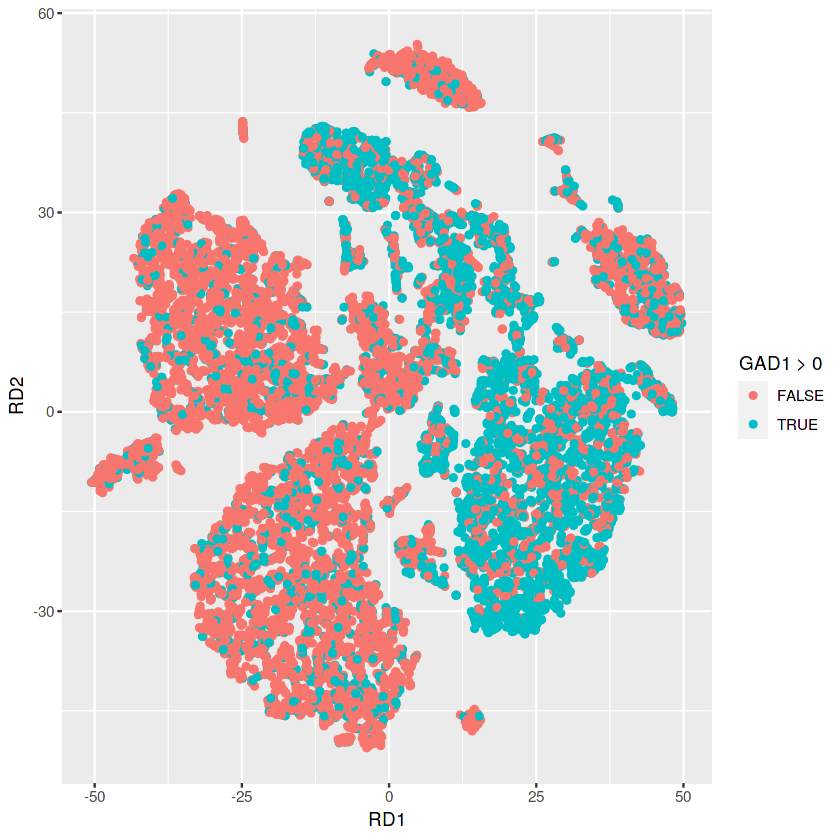

In [31]:
library(ggplot2)
PBMC_DR$GAD1 = sc1$toc["GAD1", rownames(PBMC_DR)]
gg = ggplot(PBMC_DR, aes(RD1, RD2)) + geom_point(aes(colour = GAD1 > 0))
plot(gg)

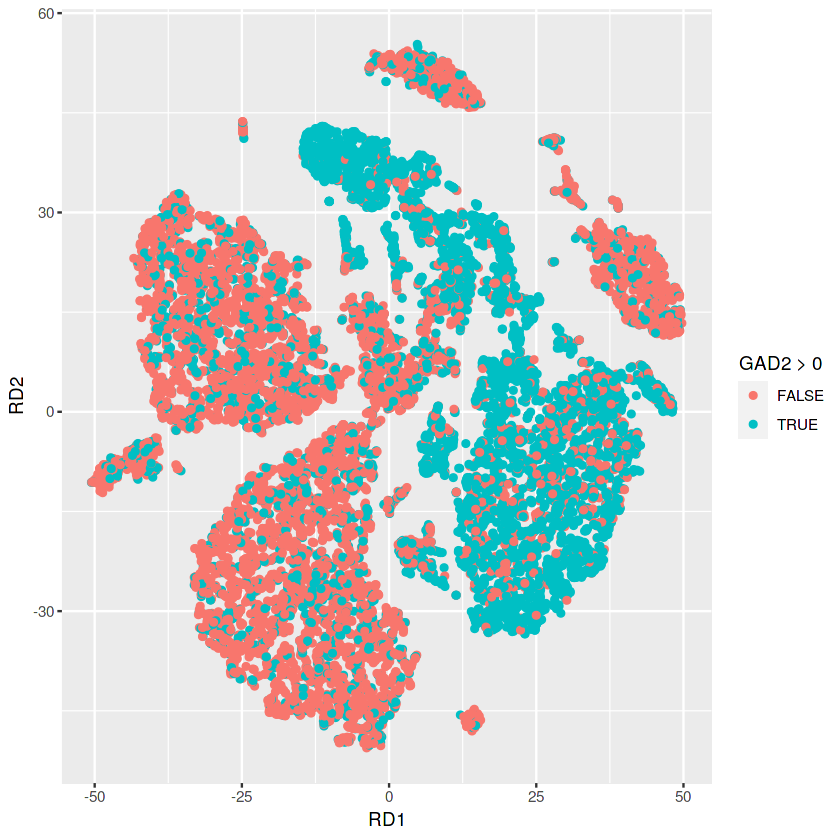

In [32]:
library(ggplot2)
PBMC_DR$GAD2 = sc1$toc["GAD2", rownames(PBMC_DR)]
gg = ggplot(PBMC_DR, aes(RD1, RD2)) + geom_point(aes(colour = GAD2 > 0))
plot(gg)

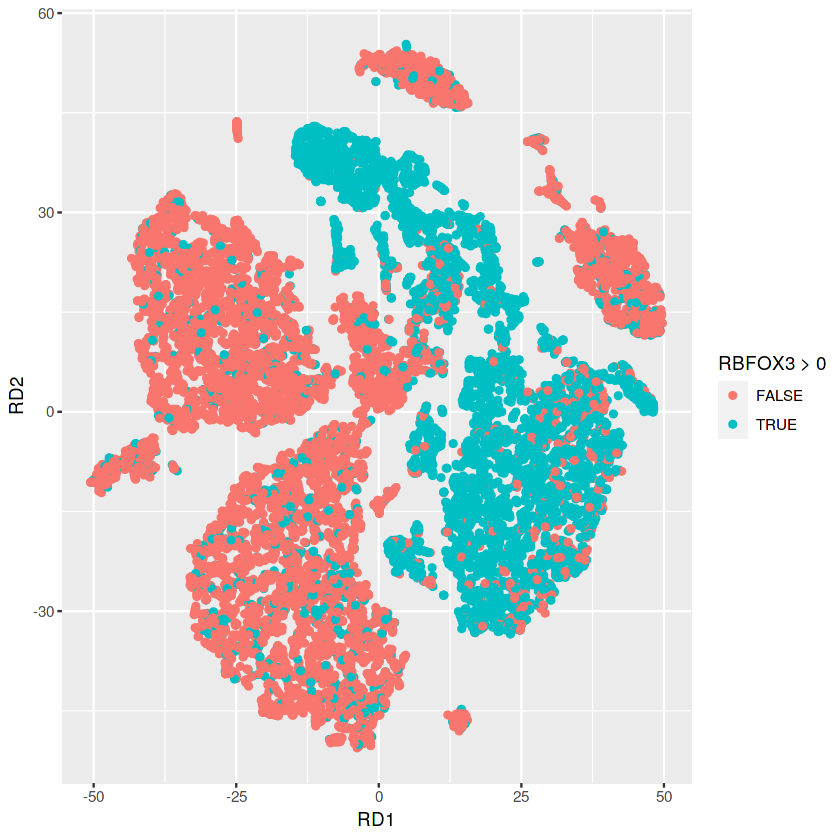

In [33]:
library(ggplot2)
PBMC_DR$RBFOX3 = sc1$toc["RBFOX3", rownames(PBMC_DR)]
gg = ggplot(PBMC_DR, aes(RD1, RD2)) + geom_point(aes(colour = RBFOX3 > 0))
plot(gg)

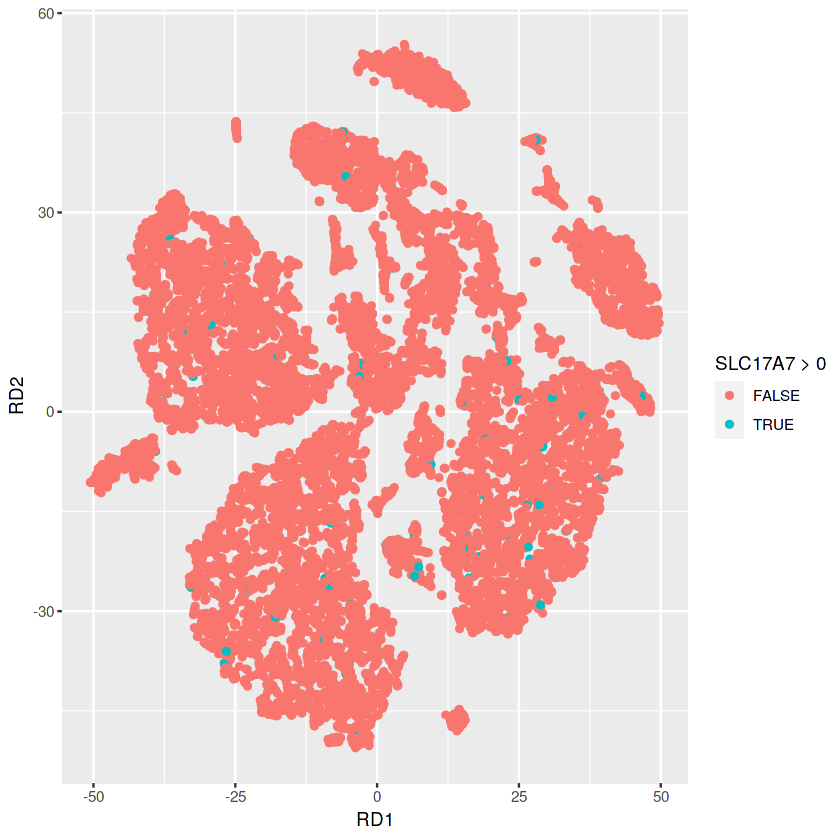

In [34]:
library(ggplot2)
PBMC_DR$SLC17A7 = sc1$toc["SLC17A7", rownames(PBMC_DR)]
gg = ggplot(PBMC_DR, aes(RD1, RD2)) + geom_point(aes(colour = SLC17A7 > 0))
plot(gg)

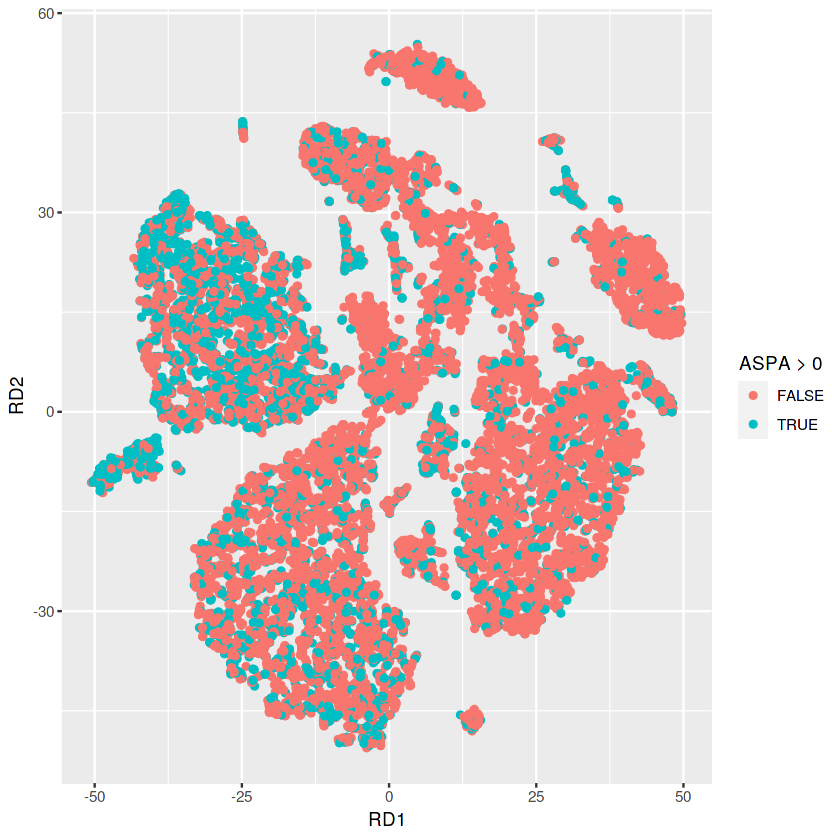

In [35]:
library(ggplot2)
PBMC_DR$ASPA = sc1$toc["ASPA", rownames(PBMC_DR)]
gg = ggplot(PBMC_DR, aes(RD1, RD2)) + geom_point(aes(colour = ASPA > 0))
plot(gg)

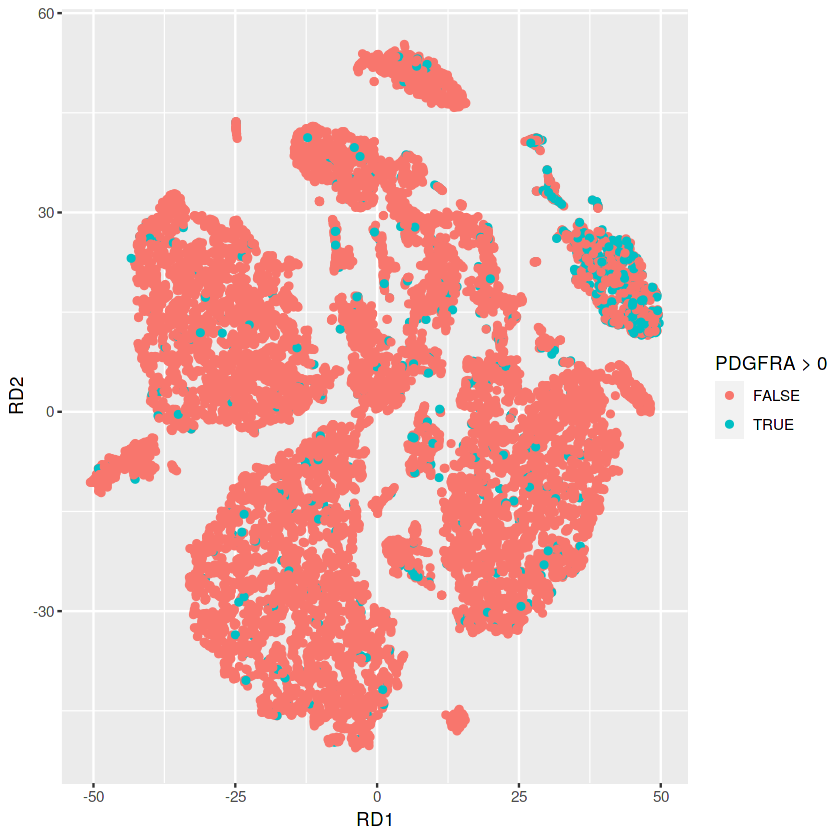

In [36]:
library(ggplot2)
PBMC_DR$PDGFRA = sc1$toc["PDGFRA", rownames(PBMC_DR)]
gg = ggplot(PBMC_DR, aes(RD1, RD2)) + geom_point(aes(colour = PDGFRA > 0))
plot(gg)

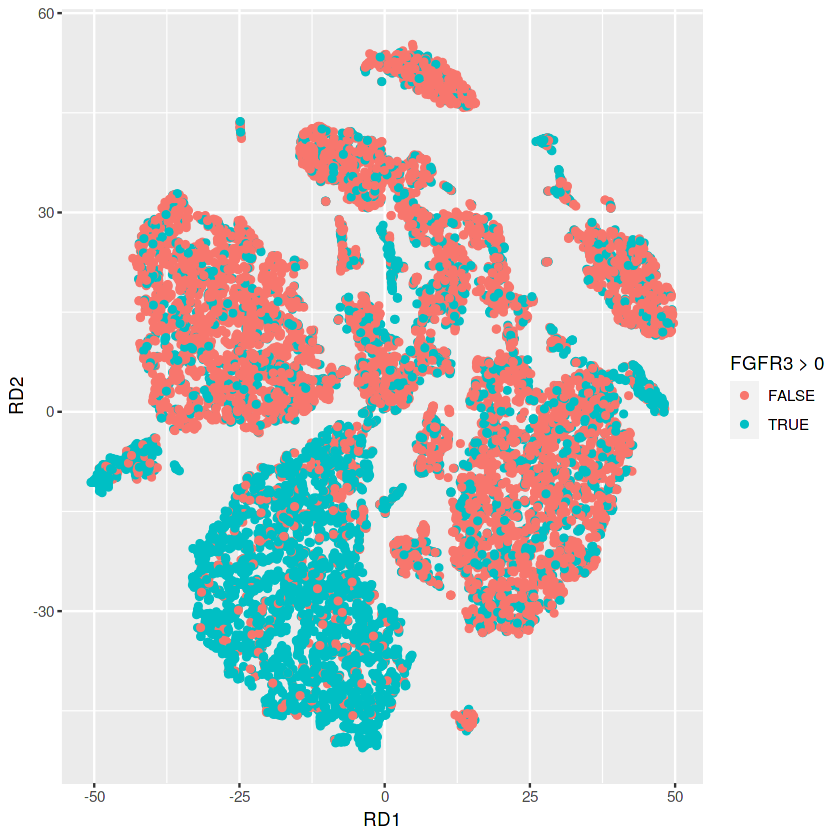

In [37]:
library(ggplot2)
PBMC_DR$FGFR3 = sc1$toc["FGFR3", rownames(PBMC_DR)]
gg = ggplot(PBMC_DR, aes(RD1, RD2)) + geom_point(aes(colour = FGFR3 > 0))
plot(gg)

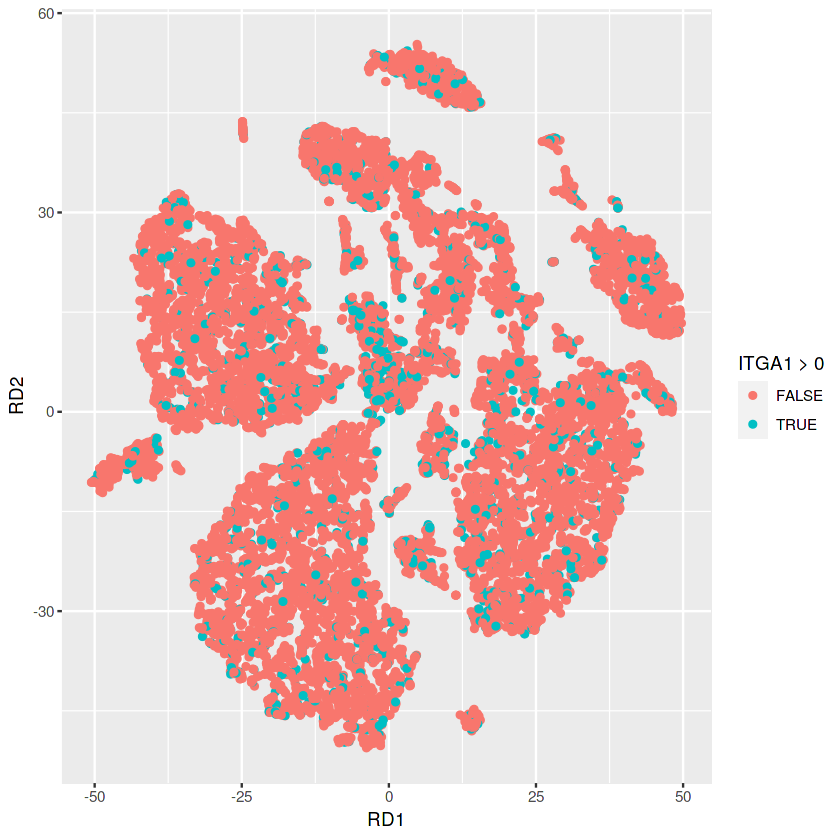

In [38]:
library(ggplot2)
PBMC_DR$ITGA1 = sc1$toc["ITGA1", rownames(PBMC_DR)]
gg = ggplot(PBMC_DR, aes(RD1, RD2)) + geom_point(aes(colour = ITGA1 > 0))
plot(gg)

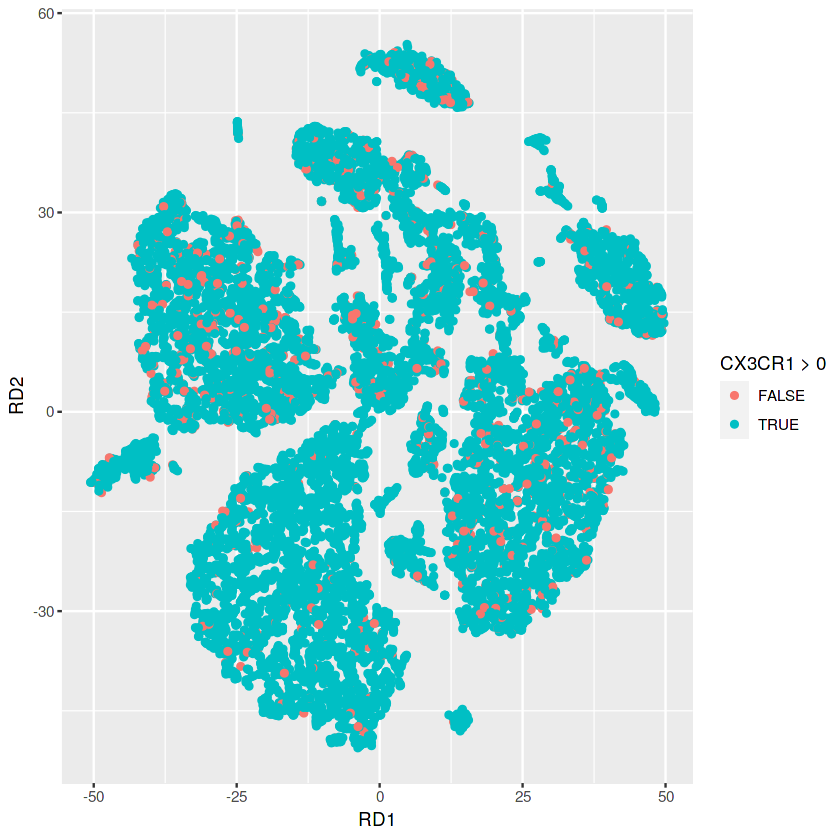

In [39]:
library(ggplot2)
PBMC_DR$CX3CR1 = sc1$toc["GFAP", rownames(PBMC_DR)]
gg = ggplot(PBMC_DR, aes(RD1, RD2)) + geom_point(aes(colour = CX3CR1 > 0))
plot(gg)

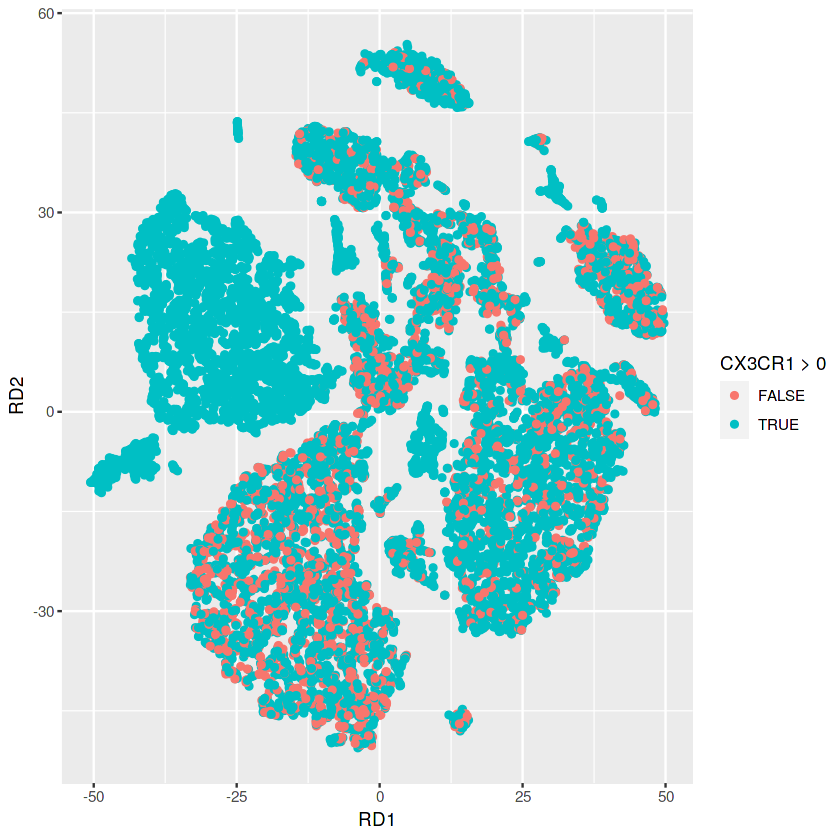

In [40]:
library(ggplot2)
PBMC_DR$CX3CR1 = sc1$toc["MBP", rownames(PBMC_DR)]
gg = ggplot(PBMC_DR, aes(RD1, RD2)) + geom_point(aes(colour = CX3CR1 > 0))
plot(gg)

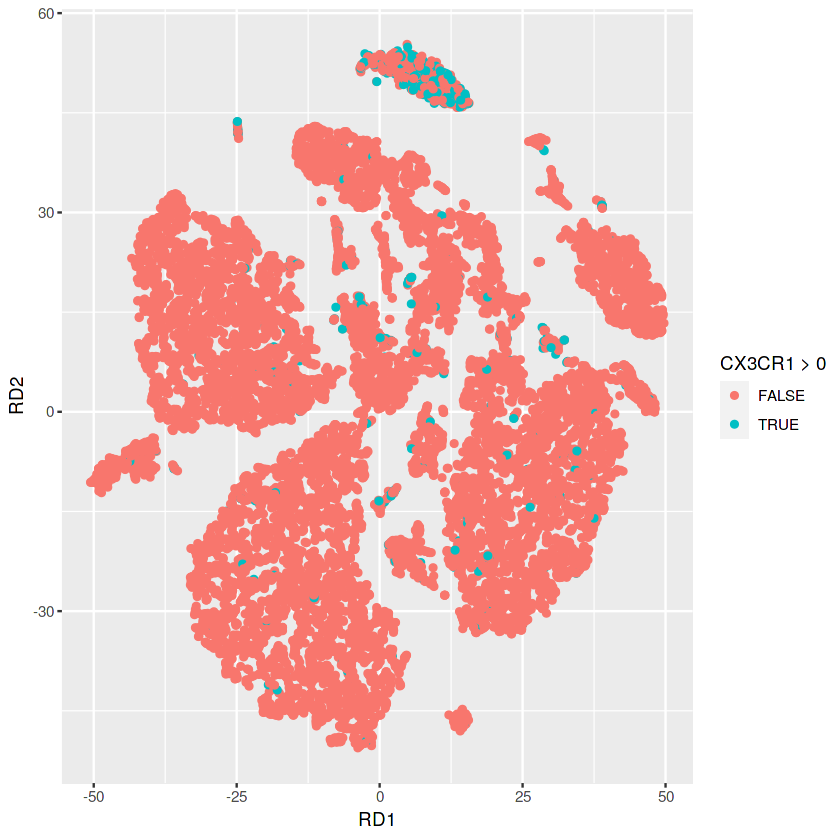

In [41]:
library(ggplot2)
PBMC_DR$CX3CR1 = sc1$toc["CX3CR1", rownames(PBMC_DR)]
gg = ggplot(PBMC_DR, aes(RD1, RD2)) + geom_point(aes(colour = CX3CR1 > 0))
plot(gg)

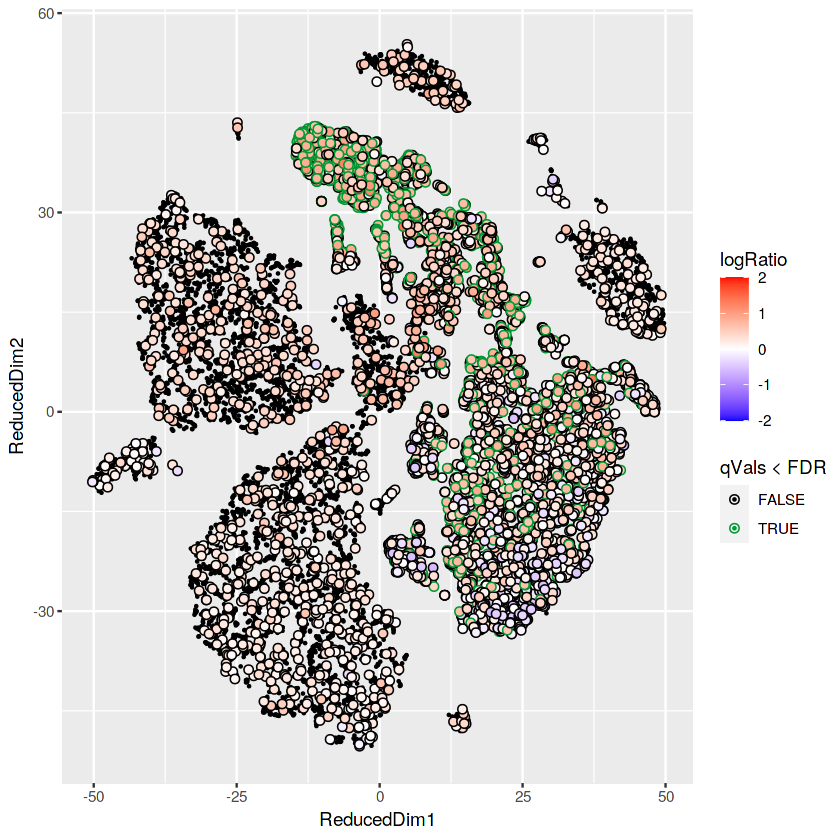

In [42]:
gg = plotMarkerMap(sc1, "RBFOX3", PBMC_DR)
plot(gg)

In [43]:
sc1 = setDR(sc1, PBMC_DR)

Warning message in setDR(sc1, PBMC_DR):
“DR has 12 columns where 2 were expected.  Using first two.”


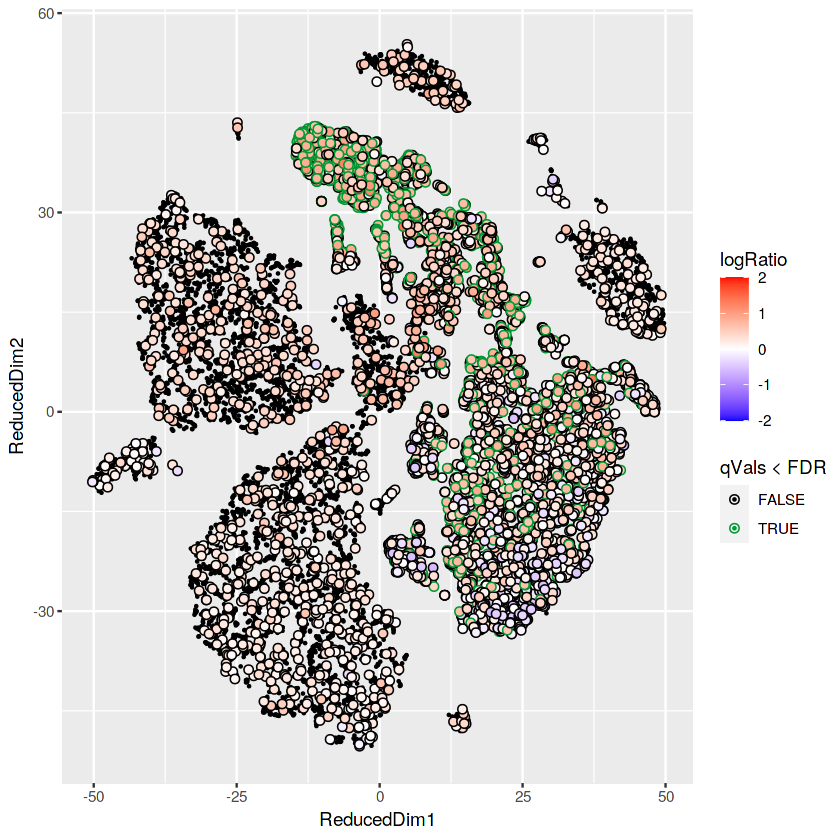

In [44]:
gg = plotMarkerMap(sc1, "RBFOX3")
plot(gg)

In [45]:
sc1 = setContaminationFraction(sc1, 0.2)

In [46]:
head(sc1$soupProfile[order(sc1$soupProfile$est, decreasing = TRUE), ], n = 20)

est         counts
MALAT1     0.030814348 367006
AC120193.1 0.005474285  65200
PCDH9      0.005116022  60933
RBFOX1     0.004807883  57263
NRXN3      0.004161548  49565
NRXN1      0.003740398  44549
CADM2      0.003465676  41277
PHACTR1    0.003285830  39135
DLG2       0.003138058  37375
GPC5       0.003025382  36033
LSAMP      0.003024459  36022
SNHG14     0.002910523  34665
KCNIP4     0.002819845  33585
NLGN1      0.002633282  31363
LRP1B      0.002610949  31097
NRG3       0.002590294  30851
RALYL      0.002392901  28500
ROBO2      0.002385680  28414
ADGRB3     0.002350416  27994
GRID2      0.002264440  26970

In [47]:
sc1 = setClusters(sc1, PBMC_DR$Cluster)

No gene lists provided, attempting to find and plot cluster marker genes.

Found 1743 marker genes

Warning message:
“Removed 202930 rows containing non-finite values (stat_ydensity).”


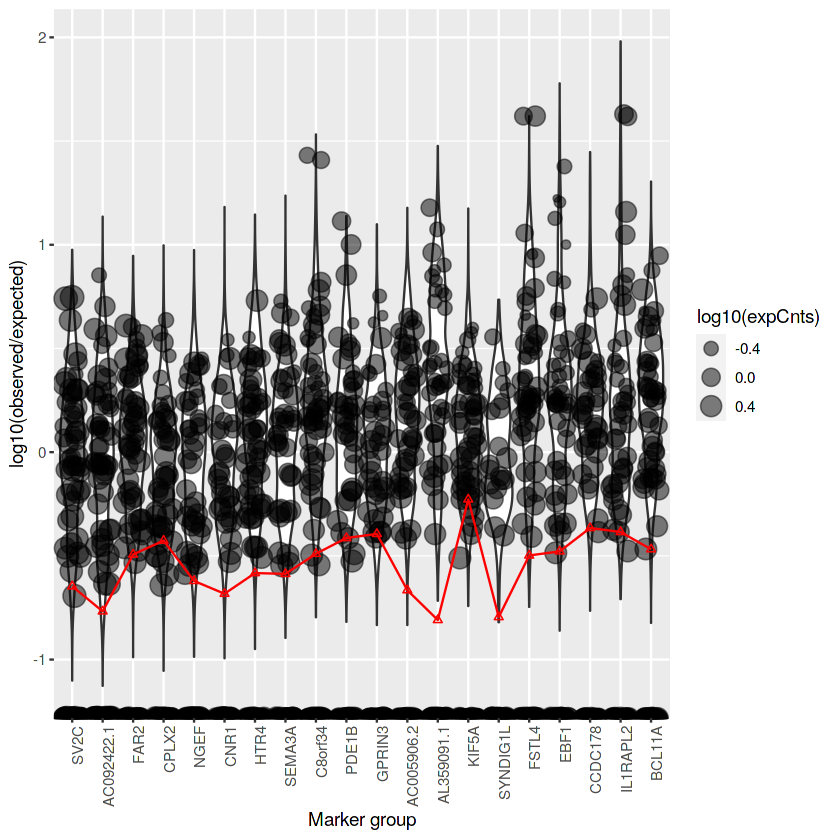

In [48]:
plotMarkerDistribution(sc1)

In [54]:
#str(sc1)

In [45]:
#sc1 = inferNonExpressedGenes(sc1)
##Error in inferNonExpressedGenes(sc1): could not find function "inferNonExpressedGenes"
##Traceback:

In [49]:
igGenes = c("SV2C","AC092422.1","FAR2","CPLX2","NGEF","CNR1","HTR4","SEMA3A","C8orf34","PDE1B","GPRIN3","AC005906.2","AL359091.1","KIF5A","SYNDIG1L","FSTL4","EBF1","CCDC178","IL1RAPL2","BCL11A")


In [50]:
useToEst = estimateNonExpressingCells(sc1, nonExpressedGeneList = list(IG = igGenes))

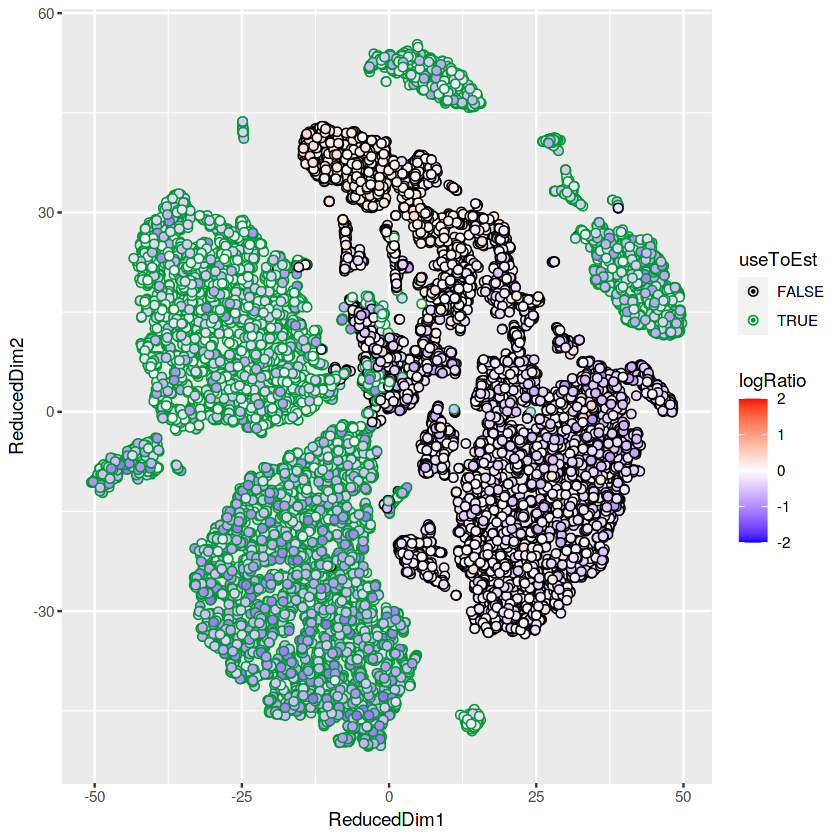

In [51]:
plotMarkerMap(sc1, geneSet = igGenes, DR = PBMC_DR, useToEst = useToEst)

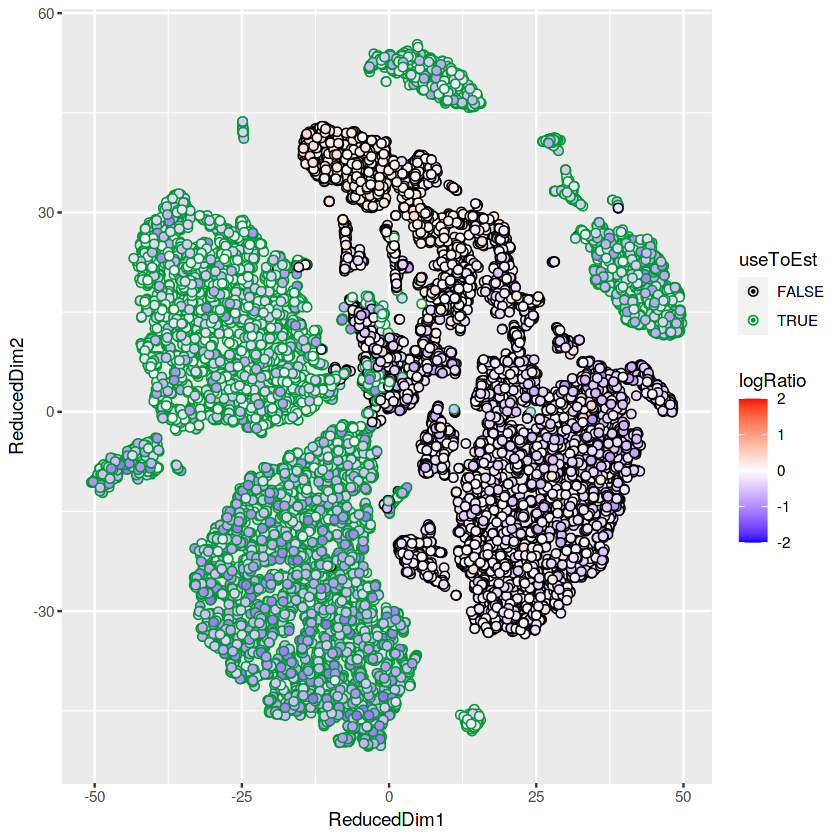

In [52]:
useToEst = estimateNonExpressingCells(sc1, nonExpressedGeneList = list(IG = igGenes), 
    clusters = setNames(PBMC_DR$Cluster, rownames(PBMC_DR)))
plotMarkerMap(sc1, geneSet = igGenes, DR = PBMC_DR, useToEst = useToEst)

In [53]:
sc1 = setClusters(sc1, PBMC_DR$Cluster)

In [54]:
sc1 = calculateContaminationFraction(sc1, list(IG = igGenes), useToEst = useToEst)

Warning message in setContaminationFraction(sc, exp(coef(sc$fit)), forceAccept = forceAccept):
“Estimated contamination is very high (0.32).”
Estimated global contamination fraction of 31.94%



In [55]:
head(sc1$metaData)

nUMIs RD1        RD2       rho      clusters rhoLow   
AAACCCAAGACTAAGT-1  6450  -4.843075 -33.30761 0.319443 1        0.3159981
AAACCCAAGCGCGTTC-1  9826   8.209124  28.29552 0.319443 11       0.3159981
AAACCCAAGCTGCGAA-1 12802   3.083475  32.58015 0.319443 3        0.3159981
AAACCCAAGTAATTGG-1 29936  25.290587  16.78900 0.319443 2        0.3159981
AAACCCACAAGAGTAT-1  5300  44.234593  14.07005 0.319443 4        0.3159981
AAACCCACAAGTCCAT-1  7551 -40.315895  28.53151 0.319443 0        0.3159981
                   rhoHigh  
AAACCCAAGACTAAGT-1 0.3229129
AAACCCAAGCGCGTTC-1 0.3229129
AAACCCAAGCTGCGAA-1 0.3229129
AAACCCAAGTAATTGG-1 0.3229129
AAACCCACAAGAGTAT-1 0.3229129
AAACCCACAAGTCCAT-1 0.3229129

In [56]:
sc1 = calculateContaminationFraction(sc1, list(IG = igGenes), useToEst = useToEst, 
    cellSpecificEstimates = TRUE)
quantile(sc1$metaData$rho)

ERROR: Error in calculateContaminationFraction(sc1, list(IG = igGenes), useToEst = useToEst, : unused argument (cellSpecificEstimates = TRUE)


In [57]:
##Manual alternative
#sc = setContaminationFraction(sc, 0.1)

In [58]:
out = adjustCounts(sc1, clusters = setNames(PBMC_DR$Cluster, rownames(PBMC_DR)))

Expanding counts from 25 clusters to 14338 cells.



In [59]:
library(Matrix)
cntSoggy = rowSums(sc1$toc > 0)
cntStrained = rowSums(out > 0)
mostZeroed = tail(sort((cntSoggy - cntStrained)/cntSoggy), n = 10)
mostZeroed

LINC01488       NRGN AL139379.1 AL589743.1     FBXL16       EPOP  LINC00654 
         1          1          1          1          1          1          1 
     CTXN1      RASD2       PCP4 
         1          1          1

In [60]:
tail(sort(rowSums(sc1$toc > out)/rowSums(sc1$toc > 0)), n = 20)

COL18A1-AS1     SLC19A1   LINC01694       PCBP3  AL133492.1  AJ011931.2 
          1           1           1           1           1           1 
     COL6A1      COL6A2        FTCD     SPATC1L         LSS  AP001469.1 
          1           1           1           1           1           1 
 MCM3AP-AS1      MCM3AP        YBEY    C21orf58        PCNT       DIP2A 
          1           1           1           1           1           1 
      S100B       PRMT2 
          1           1

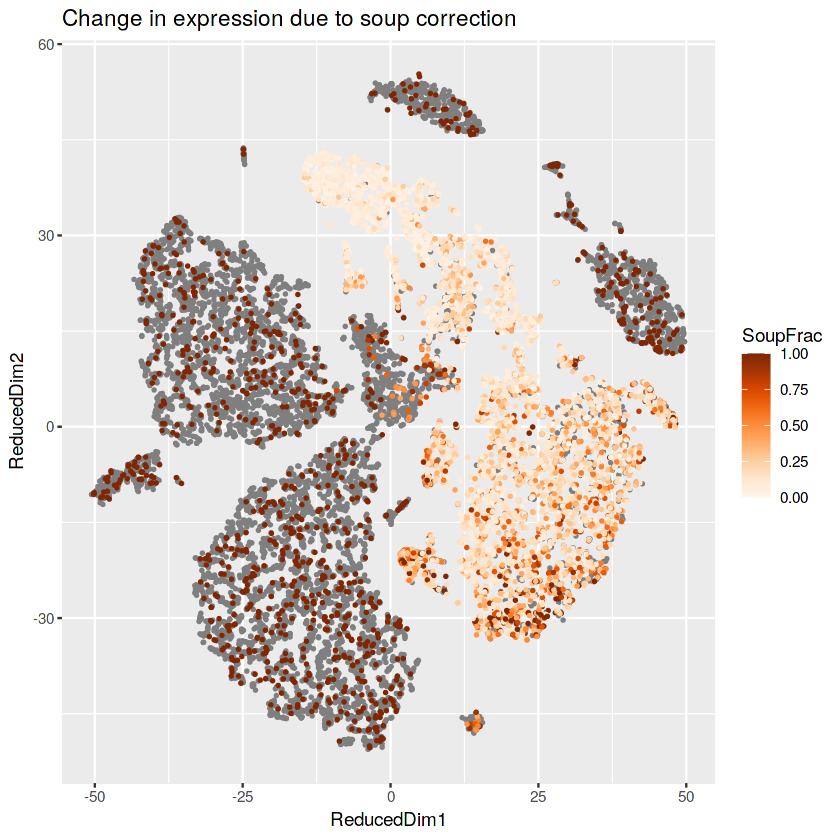

In [61]:
plotChangeMap(sc1, out, "RBFOX3")

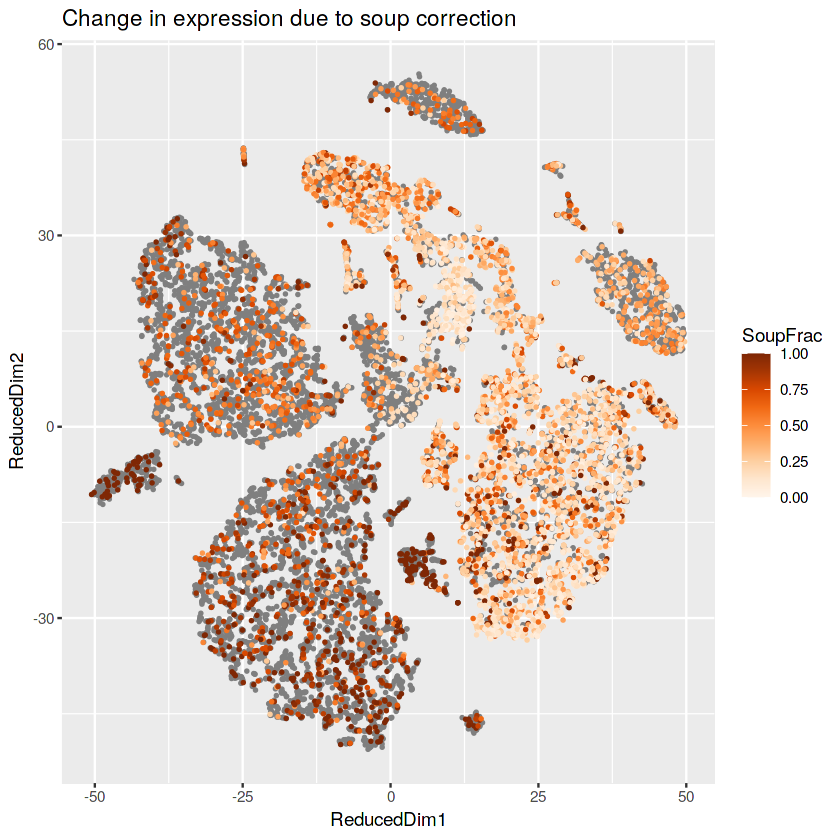

In [62]:
plotChangeMap(sc1, out, "GAD1")

In [63]:
DropletUtils:::write10xCounts("./strainedCounts_Monkey_P_Nacc_Rep2", out)